Import Libraries

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,Model
import os
import numpy as np
import matplotlib.pyplot as plt

In [26]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip' 
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True) 
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered') 

In [ ]:

# path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/DL/CNN/Transfer_Learning/cats_and_dogs.zip', origin=_URL, extract=True)
# _URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered.zip')

In [ ]:
# path_to_zip="/content/drive/MyDrive/DL/CNN/Transfer_Learning/cats_and_dogs.zip" 
# PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip') 
# New_PATH="/content/drive/MyDrive/DL/CNN/Transfer_Learning/cats_and_dogs" 
# !unzip $PATH -d $New_PATH 

In [ ]:
# dataPath='/content/drive/MyDrive/DL/CNN/Transfer_Learning/cats_and_dogs/cats_and_dogs_filtered'

In [27]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

# New Section

In [28]:
train_dir = os.path.join(PATH,'train') 
validation_dir = os.path.join(PATH,'validation') 

In [29]:
train_cats_dir = os.path.join(train_dir,'cats') # Directory with our training cat pics 
train_dogs_dir = os.path.join(train_dir,'dogs') # Directory with our training dogs pics 
validation_cats_dir = os.path.join(validation_dir,'cats') # Directory with our validation cats pics
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Directory with our validation dogs pics 

In [30]:
num_cat_tr = len(os.listdir(train_cats_dir)) 
num_dog_tr = len(os.listdir(train_dogs_dir)) 
num_cat_val = len(os.listdir(validation_cats_dir)) 
num_dog_val = len(os.listdir(validation_dogs_dir)) 
total_train = num_cat_tr + num_dog_tr 
total_val = num_cat_val + num_dog_val 

In [31]:
print('total training cat images:', num_cat_tr) 
print('total training dog images:', num_dog_tr) 
print('total validation cat images:', num_cat_val) 
print('total validation dog images:', num_dog_val) 

print("--"*25) 
print("Total training images:", total_train) 
print("Total validation images:", total_val) 

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--------------------------------------------------
Total training images: 2000
Total validation images: 1000


In [32]:
batch_size= 128 # power of 2 --> 64, 128, 256, 512 
epochs=10 
IMG_HEIGHT = 224
IMG_WIDTH = 224 

VGG16

Image Augmentation

In [ ]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

In [33]:
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=45,
                                           horizontal_flip=True, zoom_range=0.5, 
                                           width_shift_range=.15, 
                                           height_shift_range=0.15) # generator for our training data validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for our validation data 
validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for our validation data 

Traning the Validation Sets

In [34]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                                          directory = train_dir,
                                                          
                                                          target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                          class_mode='binary') # Multiclass ---> class_mode ="caterogrical" 

Found 2000 images belonging to 2 classes.


In [35]:
validation_data_gen= validation_image_generator.flow_from_directory( batch_size=batch_size,
                                                          directory = validation_dir,
                                                          
                                                          target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                          class_mode='binary') # Multiclass ---> class_mode ="caterogrical" 


Found 1000 images belonging to 2 classes.


Loading the BaseModels

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet') 

In [37]:
#We dont want to fit all the layers
for layer in base_model.layers: 
  layer.trainable=False 

Compile and Fit

In [38]:
x = layers.Flatten()(base_model.output) 
# Flatten the output to 1 dimension 
# Add a FC layer with 512 hidden units and ReLu Act 

x = layers.Dense(512,activation='relu')(x) # 
#dropout rate 0.5 
x = layers.Dropout(0.5)(x) 

In [ ]:
# Add Final Layer
x = layers.Dense(1,activation='sigmoid')(x)

In [ ]:
model= Model(base_model.input,x)

In [39]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss = 'binary_crossentropy',metrics = ['acc']) 

In [40]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
import datetime,os

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1) 
vgg16_model = model.fit(train_data_gen, validation_data = validation_data_gen,steps_per_epoch = 10, epochs = 75
                         ,callbacks=[tensorboard_callback]) 

Epoch 1/75
10/10 [==============================] - 60s 4s/step - loss: 3.8846 - acc: 0.4992 - val_loss: 1.7913 - val_acc: 0.5000
Epoch 2/75
10/10 [==============================] - 29s 3s/step - loss: 1.1435 - acc: 0.5625 - val_loss: 0.4583 - val_acc: 0.8230
Epoch 3/75
10/10 [==============================] - 31s 3s/step - loss: 0.6291 - acc: 0.6640 - val_loss: 0.4313 - val_acc: 0.8440
Epoch 4/75
10/10 [==============================] - 32s 3s/step - loss: 0.5272 - acc: 0.7435 - val_loss: 0.3878 - val_acc: 0.8430
Epoch 5/75
10/10 [==============================] - 28s 3s/step - loss: 0.4973 - acc: 0.7662 - val_loss: 0.3394 - val_acc: 0.8770
Epoch 6/75
10/10 [==============================] - 29s 3s/step - loss: 0.4692 - acc: 0.7734 - val_loss: 0.3158 - val_acc: 0.8830
Epoch 7/75
10/10 [==============================] - 29s 3s/step - loss: 0.4531 - acc: 0.7883 - val_loss: 0.2981 - val_acc: 0.8900
Epoch 8/75
10/10 [==============================] - 30s 3s/step - loss: 0.4234 - acc: 0.81

In [44]:
vgg16_model.history.keys()

NameError: ignored

In [ ]:
%reload_ext tensorboard 
%tensorboard --logdir logs 

In [ ]:
%load_ext tensorboard 
%tensorboard --logdir logs 

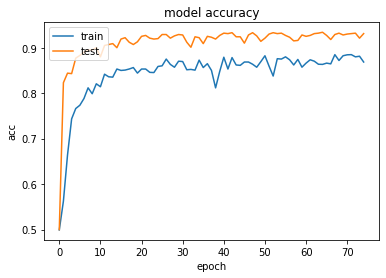

In [ ]:
plt.plot(vgg16_model.history['acc'])
plt.plot(vgg16_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

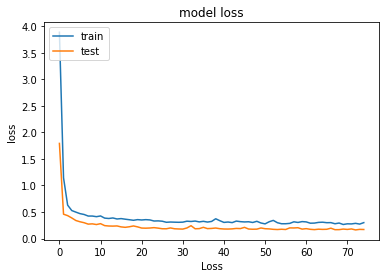

In [ ]:
plt.plot(vgg16_model.history['loss'])
plt.plot(vgg16_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir logs


In [ ]:
model = Sequential([
     Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
     , MaxPooling2D(), 
     Conv2D(32,3,padding='same',activation='relu'), 
     MaxPooling2D(), 
     Conv2D(64,3,padding='same',activation='relu'), 
     MaxPooling2D(), 
     Flatten(), Dense(512,activation='relu'), 
     Dense(1) ]) 

In [ ]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy']) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

Fitting the Model

In [ ]:
# Model fit 
history = model.fit( train_data_gen, steps_per_epoch=total_train//batch_size,
                    epochs=10, validation_data=validation_data_gen,
                    validation_steps=total_val//batch_size ) 

Epoch 1/10
15/15 [==============================] - 275s 19s/step - loss: 0.6901 - accuracy: 0.5037 - val_loss: 0.6989 - val_accuracy: 0.5011
Epoch 2/10
15/15 [==============================] - 11s 780ms/step - loss: 0.6696 - accuracy: 0.5497 - val_loss: 0.6427 - val_accuracy: 0.6429
Epoch 3/10
15/15 [==============================] - 12s 782ms/step - loss: 0.6081 - accuracy: 0.6389 - val_loss: 0.6294 - val_accuracy: 0.6060
Epoch 4/10
15/15 [==============================] - 12s 823ms/step - loss: 0.5506 - accuracy: 0.6880 - val_loss: 0.5629 - val_accuracy: 0.7065
Epoch 5/10
15/15 [==============================] - 11s 771ms/step - loss: 0.4950 - accuracy: 0.7484 - val_loss: 0.5713 - val_accuracy: 0.6842
Epoch 6/10
15/15 [==============================] - 11s 772ms/step - loss: 0.4562 - accuracy: 0.7623 - val_loss: 0.5726 - val_accuracy: 0.7165
Epoch 7/10
15/15 [==============================] - 11s 771ms/step - loss: 0.3882 - accuracy: 0.8136 - val_loss: 0.5707 - val_accuracy: 0.7165


Plot the Summary

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

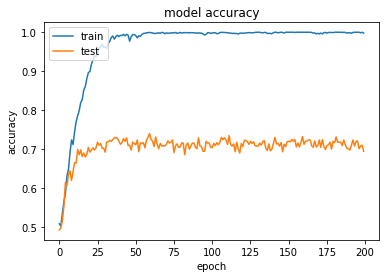

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

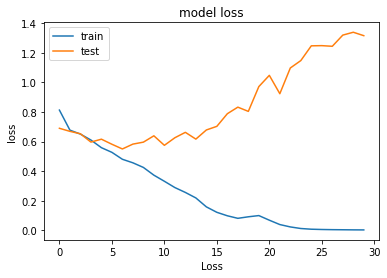

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predicting Our Model

In [ ]:
import math 
def sigmoid(x): 
  return 1/ (1+ math.exp(-x))
img_size=(150,150) 
from PIL import Image 
import numpy as np 
im = Image.open("/content/drive/MyDrive/DL/CNN/test/dog.jpeg") 
im = im.resize(img_size) 
im = np.expand_dims(im,axis=0) 
im = np.array(im) 
im = im/255 
pred = model.predict([im]) 
pred =sigmoid(pred[0][0])
if pred >=0.5: 
  prediction='dog' 
  print("Dog") 
else: 
  prediction='cat' 
  print("cat") 


Dog


Saving Model

In [ ]:

model.save("/content/drive/MyDrive/DL/CNN/catvsdog_clf.h5")

Data Augmentation

In [ ]:
#horizontal Flip

In [ ]:
train_images_horizontal = ImageDataGenerator(rescale=1./255,horizontal_flip=True) 
train_images_horizontal_gen= train_images_horizontal.flow_from_directory( batch_size=batch_size,
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary') # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


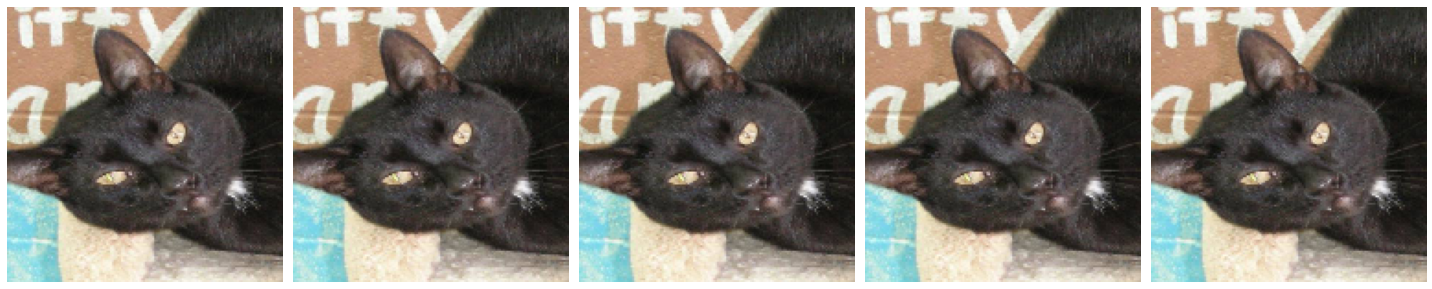

In [ ]:

augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images) 

In [ ]:
#Rotational Flip

In [ ]:
train_images_rotation = ImageDataGenerator(rescale=1./255,rotation_range=90) 
train_images_rotation_gen= train_images_rotation.flow_from_directory( batch_size=batch_size,
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary') # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


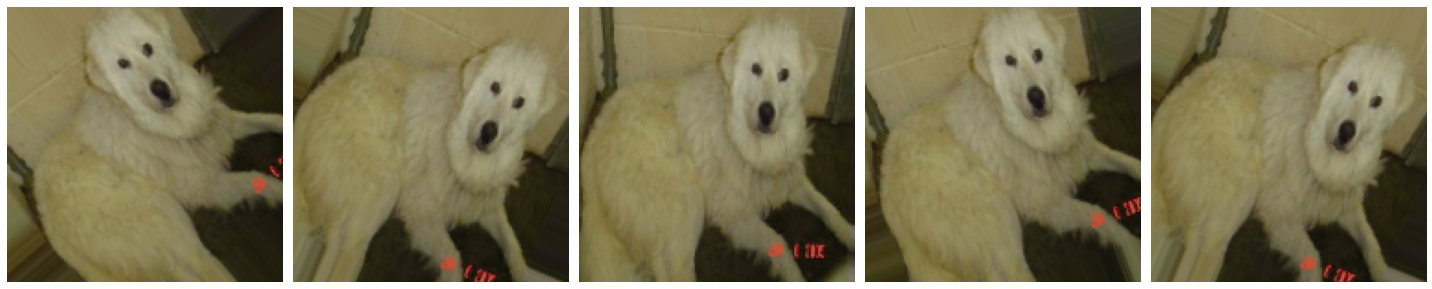

In [ ]:
augmented_images = [train_images_rotation_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images) 

In [ ]:
# Zoom Flip

In [ ]:
train_images_zoom = ImageDataGenerator(rescale=1./255,zoom_range=0.5) 
train_images_zoom_gen= train_images_zoom.flow_from_directory( batch_size=batch_size,
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary') # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


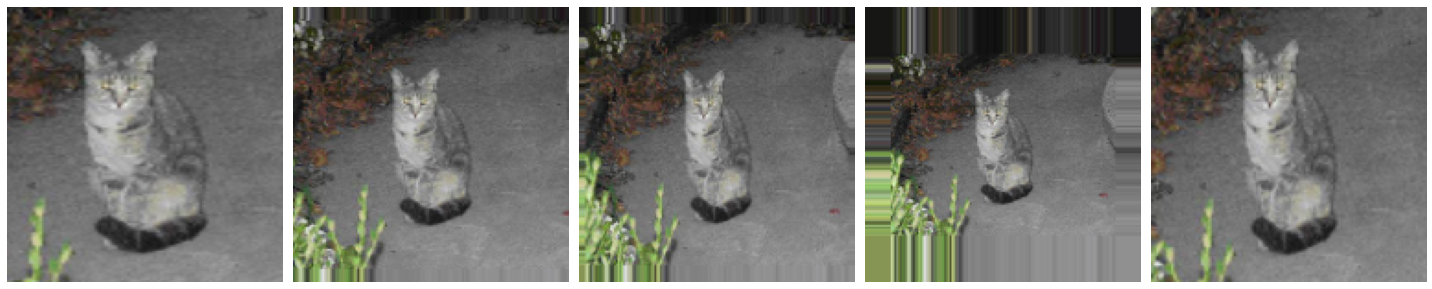

In [ ]:
augmented_images = [train_images_zoom_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images) 

In [ ]:
#Height Width shift

In [ ]:
train_images_shift = ImageDataGenerator(rescale=1./255,width_shift_range=0.15,height_shift_range=0.15) 
train_images_shift_gen= train_images_shift.flow_from_directory( batch_size=batch_size,
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=((IMG_HEIGHT,IMG_WIDTH)), 
                                                                         class_mode='binary') # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


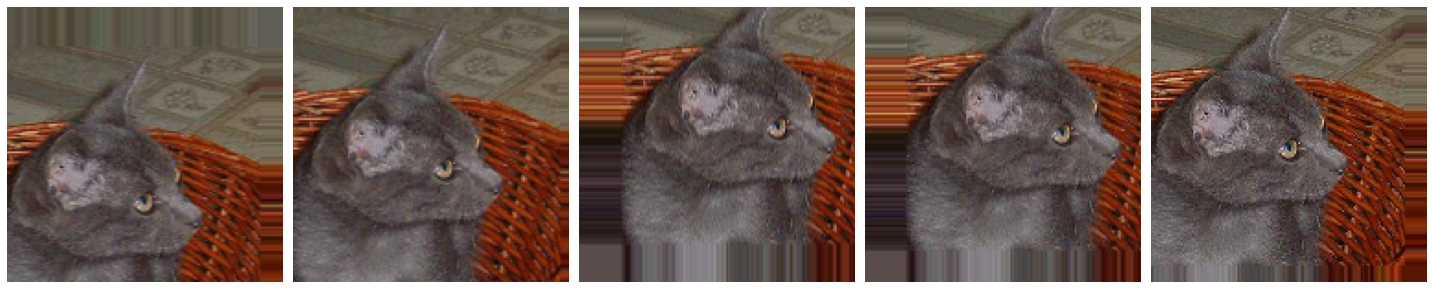

In [ ]:
augmented_images = [train_images_shift_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images) 

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           zoom_range=0.5,
                                           width_shift_range=.15,
                                           height_shift_range=0.15) # generator for our training data

In [ ]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


In [ ]:
model_new = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1,activation='sigmoid')
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [ ]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)       

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=200,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 496s 33s/step - loss: 1.6542 - accuracy: 0.4936 - val_loss: 0.6933 - val_accuracy: 0.5056
Epoch 2/200
15/15 [==============================] - 20s 1s/step - loss: 0.6939 - accuracy: 0.5118 - val_loss: 0.6917 - val_accuracy: 0.5089
Epoch 3/200
15/15 [==============================] - 20s 1s/step - loss: 0.6920 - accuracy: 0.5385 - val_loss: 0.6906 - val_accuracy: 0.5826
Epoch 4/200
15/15 [==============================] - 20s 1s/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6909 - val_accuracy: 0.5078
Epoch 5/200
15/15 [==============================] - 20s 1s/step - loss: 0.6893 - accuracy: 0.5646 - val_loss: 0.6867 - val_accuracy: 0.5547
Epoch 6/200
15/15 [==============================] - 21s 1s/step - loss: 0.6877 - accuracy: 0.5395 - val_loss: 0.6853 - val_accuracy: 0.5223
Epoch 7/200
15/15 [==============================] - 20s 1s/step - loss: 0.6837 - accuracy: 0.5497 - val_loss: 0.6821 - val_accuracy: 0.6038
Epoch 8/200
15/15 [====

Ploting the Outputs

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

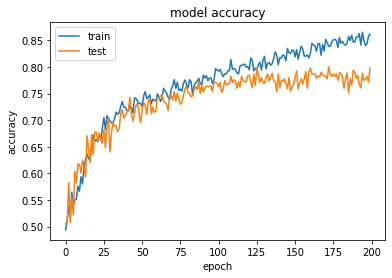

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

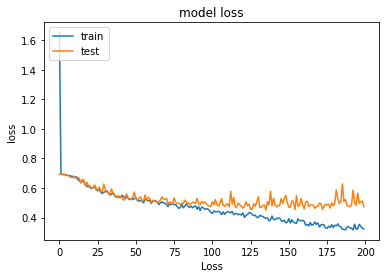

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Prediction With Agmented Model


In [ ]:
img_size=(150,150) 
from PIL import Image 
import numpy as np 
im = Image.open("/content/drive/MyDrive/DL/CNN/test/cat13.jpeg") 
im = im.resize(img_size) 
im = np.expand_dims(im,axis=0) 
im = np.array(im) 
im = im/255 
pred =model_new.predict([im]) 
if pred >=0.5: 
  prediction='dog' 
  print("Dog") 
else: 
  prediction='cat' 
  print("cat") 

Dog


Saving the Model

In [ ]:
model_new.save('/content/drive/MyDrive/DL/CNN/catvsdod_augm.h5')